In [241]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
#Allows viewing charts in the notebook
%matplotlib inline

In [242]:
#Importing the dataset
dataset = pd.read_csv(r"C:\Users\ASUS\Downloads\cars.csv").replace([np.inf, -np.inf], np.nan)
print (dataset.head())

    mpg   cylinders  cubicinches   hp  weightlbs   time-to-60   year     brand
0  14.0           8          350  165       4209           12   1972       US.
1  31.9           4           89   71       1925           14   1980   Europe.
2  17.0           8          302  140       3449           11   1971       US.
3  15.0           8          400  150       3761           10   1971       US.
4  30.5           4           98   63       2051           17   1978       US.


In [243]:
x = dataset[:-1]
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [244]:
             ###Impute / Replace Missing Values with Mean###
    
#One of the techniques is mean imputation in which the missing values are replaced with the mean value of the entire feature column. In the case of fields
#like salary, the data may be skewed as shown in the previous section. 
#In such cases, it may not be a good idea to use mean imputation for replacing
#the missing values. Note that imputing missing data with mean values can only be 
#done with numerical data."""

In [245]:
x.fillna(x.mean())

C:\Users\ASUS\AppData\Local\Temp/ipykernel_12564/2029865756.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  x.fillna(x.mean())


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
...,...,...,...,...,...,...,...,...
255,24.0,4,113,95,2372,15,1971,Japan.
256,17.0,8,305,130,3840,15,1980,US.
257,36.1,4,91,60,1800,16,1979,Japan.
258,22.0,6,232,112,2835,15,1983,US.


In [246]:
#Manipulating the dataset
x= dataset.iloc[: , :-1].values #take all the rows and all but the last column of the dataset
print (x)

[[14.0 8 '350' ... '4209' 12 1972]
 [31.9 4 '89' ... '1925' 14 1980]
 [17.0 8 '302' ... '3449' 11 1971]
 ...
 [22.0 6 '232' ... '2835' 15 1983]
 [18.0 6 '232' ... '3288' 16 1972]
 [22.0 6 '250' ... '3353' 15 1977]]


In [247]:
#Choosing the variables
print (dataset.columns[:-1]) #We do not need the columns brand with print (dataset.columns)

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year'],
      dtype='object')


In [248]:
#The dataset without the column brand
x = dataset[dataset.columns[:-1]]
x = x._convert(numeric=True)
x.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [249]:
#Eliminating null values 2
for i in x.columns:
    x[i] = x[i].fillna(int(x[i].mean()))
for i in x.columns:
    print(x[i].isnull().sum())

0
0
0
0
0
0
0


C:\Users\ASUS\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


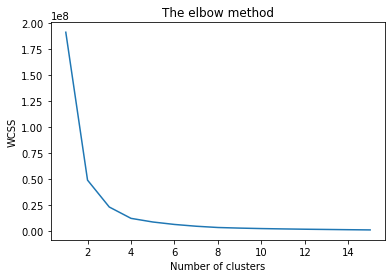

In [250]:
#Using the elbow method to find the final optimal number of clusters
from sklearn.cluster import KMeans

wcss = [] #WSS the sum of the squared distance between each member of the cluster and its centroid
for i in range(1,16):
    kmeansModel=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeansModel.fit(x)
    wcss.append(kmeansModel.inertia_)
plt.plot(range(1,16), wcss)
plt.title ('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [251]:
#Applying the kmeans to the cars dataset
kmeansModel=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeansModel = kmeansModel.fit_predict(x)
x=x.to_numpy()


In [252]:
y_kmeansModel.shape

(261,)

In [253]:
#Resizing the y matrix to fit with the dimensions of the matrix x
print(x.shape)

(261, 7)


In [254]:
 y_kmeansModel.resize((261,), refcheck=False)

In [255]:
print(y_kmeansModel.shape)

(261,)


In [256]:
x

array([[1.400e+01, 8.000e+00, 3.500e+02, ..., 4.209e+03, 1.200e+01,
        1.972e+03],
       [3.190e+01, 4.000e+00, 8.900e+01, ..., 1.925e+03, 1.400e+01,
        1.980e+03],
       [1.700e+01, 8.000e+00, 3.020e+02, ..., 3.449e+03, 1.100e+01,
        1.971e+03],
       ...,
       [2.200e+01, 6.000e+00, 2.320e+02, ..., 2.835e+03, 1.500e+01,
        1.983e+03],
       [1.800e+01, 6.000e+00, 2.320e+02, ..., 3.288e+03, 1.600e+01,
        1.972e+03],
       [2.200e+01, 6.000e+00, 2.500e+02, ..., 3.353e+03, 1.500e+01,
        1.977e+03]])

In [257]:
y_kmeansModel

array([13, 12,  7,  3, 12,  9,  1,  1,  7, 12, 11,  2, 13,  3,  0,  1, 12,
        7, 11, 11, 12,  4,  0, 13, 12,  6,  6, 10,  3, 11,  2,  8,  4,  0,
       12,  7,  6, 14,  9,  8,  9, 10,  3,  7,  8,  4,  3, 11, 12,  0,  1,
        8,  3,  2,  1,  1,  0, 12, 12,  9,  0, 11,  0,  2, 13,  7, 12, 12,
        6,  9,  8,  4, 11,  4,  2,  0,  8,  4, 11, 11,  1,  5,  7, 14,  2,
        6, 14,  7,  2, 14, 12, 11, 13,  7, 11,  9, 10,  8,  9,  9,  5,  5,
        2,  2, 11,  4, 11, 12, 14,  7, 11,  0,  1,  6,  2,  9, 14,  0, 12,
        1,  2, 12, 10, 14,  6,  4, 10,  2,  4,  6, 11, 14,  5,  3,  1, 13,
       12,  8,  0,  0, 14,  2, 14,  6,  3,  0,  7, 14,  3,  8,  4,  4,  1,
        8,  4,  8,  2,  2,  4,  7,  0, 13,  0,  0, 11,  7,  7,  4, 14,  2,
       11, 14,  0,  4,  2,  2,  1,  3,  3, 12,  0,  2, 13,  7, 11,  0,  7,
        9, 13, 10,  4, 14,  1, 13, 13,  2,  4, 12, 12, 12, 11,  4,  7,  3,
       11,  9,  2,  0, 13,  0, 14,  7,  6, 12,  8,  4, 12, 13,  4,  1,  8,
       14,  1,  9, 13, 12

In [258]:
print(y_kmeansModel.ndim)

1


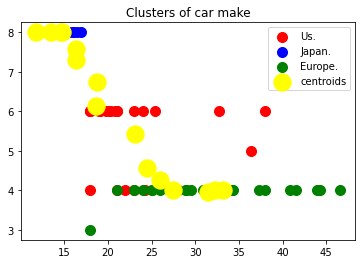

In [259]:
plt.scatter(x[y_kmeansModel == 0,0], x[y_kmeansModel == 0,1] , s=100 , c="red", label="Us.")
plt.scatter(x[y_kmeansModel == 1,0], x[y_kmeansModel == 1,1] , s=100 , c="blue", label="Japan.")
plt.scatter(x[y_kmeansModel == 2,0], x[y_kmeansModel == 2,1] , s=100 , c="green", label="Europe.")
plt.scatter(kmeansModel.cluster_centers_[:,0],kmeansModel.cluster_centers_[:,1], s=300, c="yellow",label="centroids")
plt.title("Clusters of car make")
plt.legend()
plt.show()